In [23]:
%run analyses/imports.py

### 자원 활용 성능 분석
- Execution Time
- CPU Time
- Memory Usage

In [25]:
'''
KPCA-KMeans 성능만 분석 (v1 사용)
'''
'''
src_file_msl = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/kpca_msl_perf.csv'
src_file_smap = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/kpca_smap_perf.csv'
df_msl = pd.read_csv(src_file_msl)
df_smap = pd.read_csv(src_file_smap)
'''

In [27]:
'''
Usage:

- benchmark_exp/Run_Detector_M.py 실행 후 결과 파일 경로 불러오기
 - run_performance.py는 참고용 소스 코드 (실행 권장 X)
- plot_stacked_performance_v5() 사용하여 분석 권장, 사용법은 해당 메서드 정의 참고
'''

'''
종합 성능 분석 (v5 사용)
'''
# MSL
src_file_msl_pca_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/695_pca_kpca_msl_cudaO_perf.csv'
src_file_msl_pca_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/696_pca_kpca_msl_cudaX_perf.csv'
src_file_msl_kmeansad_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/699_kmeansad_kpca_msl_cudaO_perf.csv'
src_file_msl_kmeansad_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/700_kmeansad_kpca_msl_cudaX_perf.csv'
src_file_msl_cnn_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/703_cnn_kpca_msl_cudaO_perf.csv'
src_file_msl_cnn_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/704_cnn_kpca_msl_cudaX_perf.csv'

df_msl_pca_cudaO = pd.read_csv(src_file_msl_pca_cudaO)
df_msl_pca_cudaX = pd.read_csv(src_file_msl_pca_cudaX)
df_msl_kmeansad_cudaO = pd.read_csv(src_file_msl_kmeansad_cudaO)
df_msl_kmeansad_cudaX = pd.read_csv(src_file_msl_kmeansad_cudaX)
df_msl_cnn_cudaO = pd.read_csv(src_file_msl_cnn_cudaO)
df_msl_cnn_cudaX = pd.read_csv(src_file_msl_cnn_cudaX)

# SMAP
src_file_smap_pca_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/697_pca_kpca_smap_cudaO_perf.csv'
src_file_smap_pca_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/698_pca_kpca_smap_cudaX_perf.csv'
src_file_smap_kmeansad_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/701_kmeansad_kpca_smap_cudaO_perf.csv'
src_file_smap_kmeansad_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/702_kmeansad_kpca_smap_cudaX_perf.csv'
src_file_smap_cnn_cudaO = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/705_cnn_kpca_smap_cudaO_perf.csv'
src_file_smap_cnn_cudaX = '/home/hwkang/dev-TSB-AD/TSB-AD/tests/performance/706_cnn_kpca_smap_cudaX_perf.csv'

df_smap_pca_cudaO = pd.read_csv(src_file_smap_pca_cudaO)
df_smap_pca_cudaX = pd.read_csv(src_file_smap_pca_cudaX)
df_smap_kmeansad_cudaO = pd.read_csv(src_file_smap_kmeansad_cudaO)
df_smap_kmeansad_cudaX = pd.read_csv(src_file_smap_kmeansad_cudaX)
df_smap_cnn_cudaO = pd.read_csv(src_file_smap_cnn_cudaO)
df_smap_cnn_cudaX = pd.read_csv(src_file_smap_cnn_cudaX)

In [28]:
'''
KPCA-KMeans 성능 분석
'''
def plot_stacked_performance_v1(df, metric='time'):
    if metric == 'time':
        df = df.iloc[:, [0, 1, 2, 3, 4, 5]]
    elif metric == 'cpu':
        df = df.iloc[:, [0, 1, 6, 7, 8, 9]]
    elif metric == 'memory':
        df = df.iloc[:, [0, 1, 10, 11, 12, 13]]

    if metric == 'all':
        df = df.sort_values(by=df.columns[1])
        x_label = df.columns[1]
        x_values = df[x_label].astype(str)
        x = np.arange(len(x_values))
        width = 0.25

        fig, ax = plt.subplots(figsize=(14, 6))

        # Grouping by metric
        metric_blocks = {
            'time': [2, 3, 4, 5],
            'cpu': [6, 7, 8, 9],
            'memory': [10, 11, 12, 13],
        }

        # Base colors for each metric group
        base_colors = {
            'time': '#1b9e77',    # green
            'cpu': '#d95f02',     # orange
            'memory': '#7570b3',  # blue
        }

        # Hatch patterns by metric
        hatch_patterns = {
            'time': '',
            'cpu': '///',
            'memory': '...',
        }

        # Stage names in order
        stage_names = ['fit', 'transform', 'importance', 'kmeans']

        for i, (metric_name, col_indices) in enumerate(metric_blocks.items()):
            group_df = df.iloc[:, [1] + col_indices]
            group_df.columns = [x_label] + stage_names
            stack_cols = group_df.columns[1:]

            # Create color shades (from dark to light of base color)
            base_color = mcolors.to_rgb(base_colors[metric_name])
            stage_colors = [
                mcolors.to_hex([min(1.0, c + 0.15 * j) for c in base_color])
                for j in range(len(stack_cols))
            ]

            bottom = np.zeros(len(group_df))
            for j, col in enumerate(stack_cols):
                ax.bar(
                    x + (i - 1) * width,
                    group_df[col].values,
                    width=width,
                    bottom=bottom,
                    label=f'{metric_name}-{col}',
                    color=stage_colors[j],
                    #hatch=hatch_patterns[metric_name],
                    edgecolor='black',
                    linewidth=0.5
                )
                bottom += group_df[col].values

        ax.set_xticks(x)
        ax.set_xticklabels(x_values, rotation=45)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Value")
        ax.set_title("Grouped Stacked Performance (Shaded Colors + Hatch)")
        ax.legend(title="Metric-Stage", bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        # 두 번째 열을 기준으로 정렬 (시계열 길이 기준)
        df = df.sort_values(by=df.columns[1])
        x_label = df.columns[1]
        x_values = df[x_label].astype(str)  # X축이 숫자면 시각적으로 붙기 때문에 문자열로 변환

        # 스택할 열: 세 번째 열부터 마지막까지
        stack_cols = df.columns[2:]

        # plot 초기화
        plt.figure(figsize=(12, 6))

        # 바텀을 누적해서 쌓기 위한 변수 초기화
        bottom = np.zeros(len(df))

        # 열 순서대로 스택
        for col in stack_cols:
            plt.bar(x_values, df[col], bottom=bottom, label=col)
            bottom += df[col].values  # 누적값 업데이트

        plt.title(f'Stacked {metric.capitalize()} by {x_label}')
        plt.xlabel(x_label)
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45)
        plt.legend(title='Component')
        plt.tight_layout()
        plt.show()

In [29]:
'''
KPCA-KMeans-Model 개별 성능 분석
'''
def plot_stacked_performance_v2(df, metric='time'):
    if metric == 'time':
        df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
    elif metric == 'cpu':
        df = df.iloc[:, [0, 1, 7, 8, 9, 10, 11]]
    elif metric == 'memory':
        df = df.iloc[:, [0, 1, 12, 13, 14, 15, 16]]

    if metric == 'all':
        df = df.sort_values(by=df.columns[1])
        x_label = df.columns[1]
        x_values = df[x_label].astype(str)
        x = np.arange(len(x_values))
        width = 0.25

        fig, ax = plt.subplots(figsize=(14, 6))

        # Grouping by metric
        metric_blocks = {
            'time': [2, 3, 4, 5, 6],
            'cpu': [7, 8, 9, 10, 11],
            'memory': [12, 13, 14, 15, 16],
        }

        # Base colors for each metric group
        base_colors = {
            'time': '#1b9e77',    # green
            'cpu': '#d95f02',     # orange
            'memory': '#7570b3',  # blue
        }

        # Hatch patterns by metric
        hatch_patterns = {
            'time': '',
            'cpu': '///',
            'memory': '...',
        }

        # Stage names in order
        stage_names = ['fit', 'transform', 'importance', 'kmeans', 'model']

        for i, (metric_name, col_indices) in enumerate(metric_blocks.items()):
            group_df = df.iloc[:, [1] + col_indices]
            group_df.columns = [x_label] + stage_names
            stack_cols = group_df.columns[1:]

            # Create color shades (from dark to light of base color)
            base_color = mcolors.to_rgb(base_colors[metric_name])
            stage_colors = [
                mcolors.to_hex([min(1.0, c + 0.15 * j) for c in base_color])
                for j in range(len(stack_cols))
            ]

            bottom = np.zeros(len(group_df))
            for j, col in enumerate(stack_cols):
                ax.bar(
                    x + (i - 1) * width,
                    group_df[col].values,
                    width=width,
                    bottom=bottom,
                    label=f'{metric_name}-{col}',
                    color=stage_colors[j],
                    #hatch=hatch_patterns[metric_name],
                    edgecolor='black',
                    linewidth=0.5
                )
                bottom += group_df[col].values

        ax.set_xticks(x)
        ax.set_xticklabels(x_values, rotation=45)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Value")
        ax.set_title("Grouped Stacked Performance (Shaded Colors + Hatch)")
        ax.legend(title="Metric-Stage", bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        # 두 번째 열을 기준으로 정렬 (시계열 길이 기준)
        df = df.sort_values(by=df.columns[1])
        x_label = df.columns[1]
        x_values = df[x_label].astype(str)  # X축이 숫자면 시각적으로 붙기 때문에 문자열로 변환

        # 스택할 열: 세 번째 열부터 마지막까지
        stack_cols = df.columns[2:]

        # plot 초기화
        plt.figure(figsize=(12, 6))

        # 바텀을 누적해서 쌓기 위한 변수 초기화
        bottom = np.zeros(len(df))

        # 열 순서대로 스택
        for col in stack_cols:
            plt.bar(x_values, df[col], bottom=bottom, label=col)
            bottom += df[col].values  # 누적값 업데이트

        plt.title(f'Stacked {metric.capitalize()} by {x_label}')
        plt.xlabel(x_label)
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45)
        plt.legend(title='Component')
        plt.tight_layout()
        plt.show()

In [30]:
'''
KPCA-KMeans-Model 종합 성능 분석

Usage:
- target_dict는 모델의 이름을 키, 데이터프레임을 값으로 가짐. 키는 범례로 사용됨
- metric은 'time', 'cpu', 'memory' 중 하나 선택
- exclude_features는 실행 단계 중 제외할 것을 가리키는 리스트 'fit, transform, importance, kmeans, model' 중 복수 선택 가능
 - 예: exclude_features=['fit', 'transform']는 fit과 transform 단계를 제외하고 분석
'''
def plot_stacked_performance_v5(target_dict, metric='time', exclude_features=[]):
    '''
    Parameters:
    - target_dict: dict, {model_name: DataFrame}
    - metric: str, 'time', 'cpu', or 'memory'
    - exclude_features: list, ['fit', 'transform', 'importance', 'kmeans', 'model']
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import numpy as np

    metric_col_indices = {
        'time': ['kpca_fit_time','kpca_transform_time','importance_time','kmeans_time','model_time'],
        'cpu': ['kpca_fit_cpu_time','kpca_transform_cpu_time','importance_cpu_time','kmeans_cpu_time','model_cpu_time'],
        'memory': ['kpca_fit_mem','kpca_transform_mem','importance_mem','kmeans_mem','model_mem'],
    }

    assert len(exclude_features) < 5, "exclude_features can only contain up to 5 items: 'fit', 'transform', 'importance', 'kmeans', 'model'"

    if len(exclude_features) > 0:
        # metric_col_indices[metric]에 exclude_features에 해당하는 항목 제거
        metric_col_indices = {
            k: [v for v in v_list if v not in exclude_features]
            for k, v_list in metric_col_indices.items()
        }
                
    if metric not in metric_col_indices:
        raise ValueError("metric must be one of: 'time', 'cpu', 'memory'")

    #col_indices = [1] + metric_col_indices[metric]
    offset = 2 if metric == 'time' else 7 if metric == 'cpu' else 12
    col_indices = [1] + [i+offset for i, v in enumerate(metric_col_indices[metric]) if v not in exclude_features]
    if len(exclude_features) > 0:
        stage_names = [f for f in ['fit', 'transform', 'importance', 'kmeans', 'model'] if f not in exclude_features]
    else:
        stage_names = ['fit', 'transform', 'importance', 'kmeans', 'model']
    #print(stage_names)

    hatch_patterns = {
        'fit': '',
        'transform': '//',
        'importance': '..',
        'kmeans': '\\\\',
        'model': 'xx',
    }

    # ✅ 1. 모든 length 값 수집 후 정렬
    all_lengths = sorted(set(np.concatenate([df.iloc[:, 1].values for df in target_dict.values()])))
    x = np.arange(len(all_lengths))
    model_names = list(target_dict.keys())
    bar_width = 0.8 / len(model_names)

    cmap = plt.get_cmap('tab10')
    model_colors = {model: cmap(i) for i, model in enumerate(model_names)}

    fig, ax = plt.subplots(figsize=(16, 5))

    for i, (model_name, df) in enumerate(target_dict.items()):

        df = df.iloc[:, col_indices].copy()
        # df 열 중 exclude_features의 키워드를 포함하는 열 제거
        df = df[[col for col in df.columns if not any(ex in col for ex in exclude_features)]]
        # length 열 이름 변경
        df.columns = ['length'] + stage_names

        # ✅ 2. length를 기준으로 재정렬
        df = df[df['length'].isin(all_lengths)]
        # ✅ 중복 제거: 각 length별 평균 성능 사용
        df = df.groupby('length', as_index=False).mean()
        df = df.set_index('length').reindex(all_lengths).reset_index()

        # length 열 제외 나머지는 각각 0-1 사이로 정규화
        '''
        for stage in stage_names:
            if stage in df.columns:
                df[stage] = (df[stage] - df[stage].min()) / (df[stage].max() - df[stage].min())
        '''

        bottoms = np.zeros(len(df))
        base_color = model_colors[model_name]

        for j, stage in enumerate(stage_names):
            values = df[stage].values.astype(float)
            ax.bar(
                x + i * bar_width,
                values,
                bottom=bottoms,
                width=bar_width,
                color=base_color,
                hatch=hatch_patterns[stage],
                edgecolor='black',
                linewidth=0.3,
                label=None
            )
            bottoms += values

    ax.set_xticks(x + bar_width * (len(model_names) - 1) / 2)
    ax.set_xticklabels([str(l) for l in all_lengths], rotation=45)
    ax.set_xlabel('Length')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'Model-wise Stacked {metric.capitalize()} by Length')

    # 범례 구성
    # ✅ 모델 범례 (수평 배치)
    model_patches = [mpatches.Patch(color=model_colors[m], label=m) for m in model_names]

    fig.legend(
        handles=model_patches,
        #title='Model',
        loc='lower center',
        bbox_to_anchor=(0.5, -0.12),  # ✅ xlabel보다 더 아래
        ncol=len(model_names),
        fontsize='small',
        title_fontsize='medium',
        frameon=False,
        bbox_transform=fig.transFigure  # ✅ 절대 좌표 기준
    )

    # ✅ 스택 순서 맞춰서 Stage 범례 (아래부터 fit이 올라오도록)
    stage_patches = [
        mpatches.Patch(facecolor='white', hatch=hatch_patterns[s], edgecolor='black', label=s)
        for s in reversed(stage_names)
    ]
    legend2 = ax.legend(
        handles=stage_patches,
        title='Stage',
        loc='upper left',
        bbox_to_anchor=(1.02, 1),
        fontsize='small',
        title_fontsize='medium'
    )

    fig.subplots_adjust(bottom=0.1, right=0.85)
    plt.show()

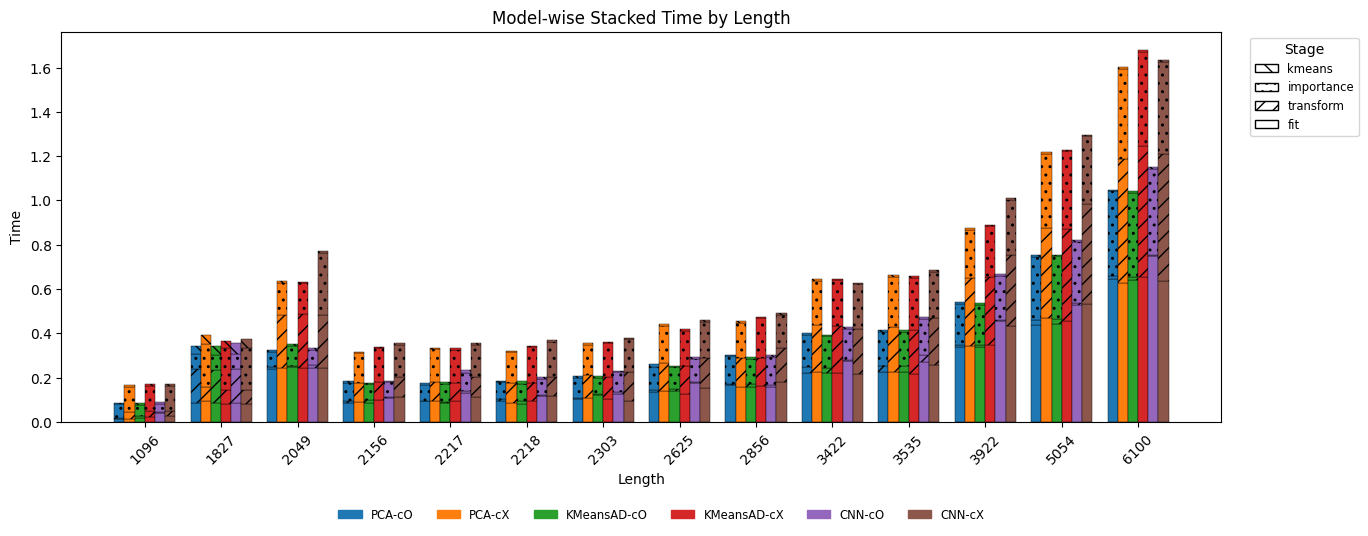

In [33]:
target_dict_msl = {
    'PCA-cO': df_msl_pca_cudaO,
    'PCA-cX': df_msl_pca_cudaX,
    'KMeansAD-cO': df_msl_kmeansad_cudaO,
    'KMeansAD-cX': df_msl_kmeansad_cudaX,
    'CNN-cO': df_msl_cnn_cudaO,
    'CNN-cX': df_msl_cnn_cudaX,
}
plot_stacked_performance_v5(target_dict_msl, metric='time', exclude_features=['model'])

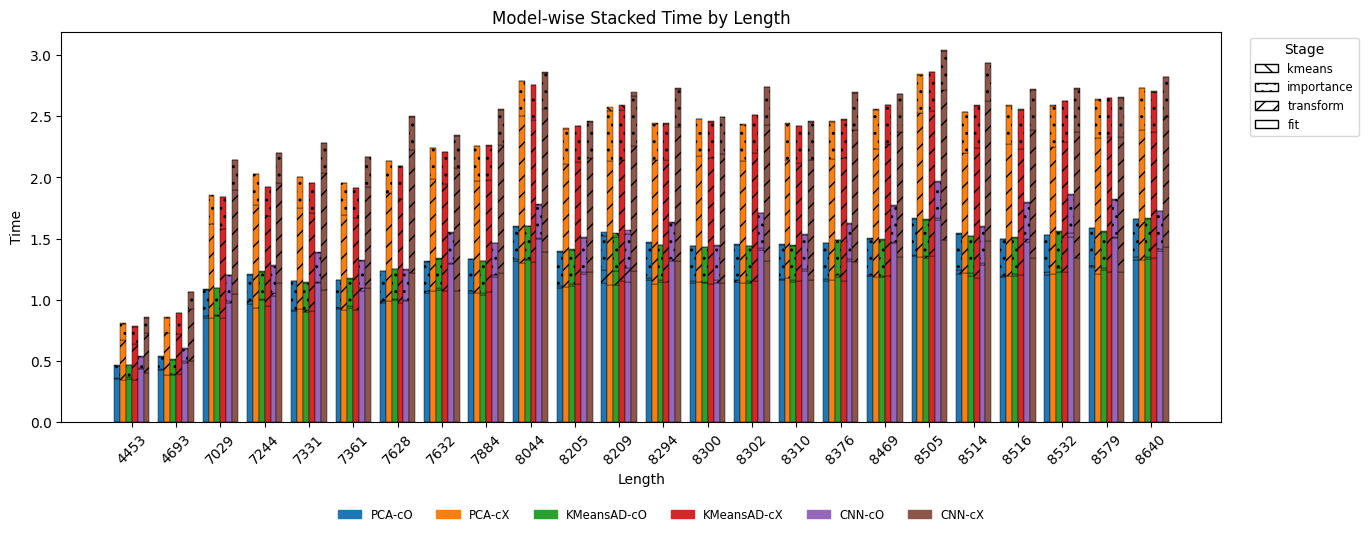

In [36]:
target_dict_smap = {
    'PCA-cO': df_smap_pca_cudaO,
    'PCA-cX': df_smap_pca_cudaX,
    'KMeansAD-cO': df_smap_kmeansad_cudaO,
    'KMeansAD-cX': df_smap_kmeansad_cudaX,
    'CNN-cO': df_smap_cnn_cudaO,
    'CNN-cX': df_smap_cnn_cudaX,
}
plot_stacked_performance_v5(target_dict_smap, metric='time', exclude_features=['model'])